<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Assignment</h1>
<h1 align="center">Bank Marketing Campaign Prediction</h1>
<br>
<h3 align="center">Word Count: 1630</h3>
<h3 align="center"><a href="https://github.com/wweeeyyy/MSIN0097_Individual">Github repository link</a></h3> 
<h3 align="center">March 2021</h3>

<h3>Table of Contents</h3>

* [1. Introduction of the problem](#1.-Introduction-of-the-problem)
    * [1.1 Dataset obtaining](#1.1-Dataset-obtaining)
* [2. Data visualization](#2.-Data-visualization)
* [3. Data preparation](#3.-Data-preparation)
* [4. Select and Train a Model](#4.-Select-and-Train-a-Model)
    * [4.1 SVM](#4.1-SVM)
    * [4.2 Logistic Regression](#4.2-Logistic-Regression)
    * [4.3 Random Forest](#4.3-Random-Forest)
    * [4.4 Majority Voting](#4.4-Majority-Voting)
    * [4.5 Model Comparison](#4.5-Model-Comparison)
* [5. Model tuning](#5.-Model-tuning)
* [6. Conclusion](#6.-Conclusion)

* [7. References](#7.-References)

# Set up and load necessary packages

In [2]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.patches import Rectangle

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from scipy.stats import randint
from scipy import stats

# 1. Introduction of the problem

Bankers always want more customer to have term deposit in their banks. This is because when a customer store term deposit in a bank, they are more likely to stick with the bank (so higher customer loyalty) and tend to buy other financial products in the bank.

In this project, we are collecting marketing data from a bank. The dataset is the outcome of a recently marketing compaign. We are intend to identify the features of consumers who are most likely to subscribe term deposit and the strategy of marketing campaign which is most helpful in getting customers agree to subscribe. The result of this work could help banks to save cost from calling and put more effort in targeting the customers that are more likely to subscribe. The dataset is collected from [kaggle](https://www.kaggle.com/singhaprajita7/bankingmarketing).

## 1.1 Dataset obtaining

In [3]:
# import dataset
bank_marketing = pd.read_csv('/Users/user_name_input/Desktop/bank-additional-full.csv', sep = ';')
df = pd.DataFrame(bank_marketing)


In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<div class="alert alert-success">
Since we only want to examine consumers' features and the activities performed in the compaign, we decide to drop redundant columns: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.
</div>

In [5]:
# drop columns
df = df.drop(['emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [6]:
# check the catigorical variables and find the number of samples in each category within each variable

for attribute in df:
    if df[attribute].dtype == object:
        print(df[attribute].value_counts(),'\n\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64 


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 


cellular     26144
telephone    15044
Name: contact, dtype: int64 


may    13769
jul 

In [7]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [8]:
df['pdays'].value_counts().head()

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

<div class="alert alert-success">
After checking the categorical variables, we can find that the dataset is very imbalanced, especially of variables: default, poutcome, previous, pdays. They have around 90% of the samples in one category which may lead the Machine Learning (ML) algorithms to run with a bias and cannot figure out the true trend. In addition, since these variables are not relating to the current campaign, we decide to drop these four columns.
</div>

In [9]:
# drop the columns
df = df.drop(['default','poutcome', 'previous', 'pdays'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   duration     41188 non-null  int64 
 10  campaign     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


<div class="alert alert-success">

- age: age of the customer
- job: job type of the customer
- marital: marital status of the customer 
- education: education level of the customer
- age: age of the customer
- housing: whether the customer has a housing loan
- loan: whether the customer has an individual loan
- contact: type of contact communication (cellular, telephone)
- month: month that last contact was made
- day_of_week: day that last contact was made
- duration: duration of last contact in seconds
- campaign: number of contacts performed during this campaign for this client (including last contact)
- y: outcome of the campaign, indicating whether the client has subscribed for a term deposit	

</div>

In [11]:
df.describe()

,age,duration,campaign
count,41188.00000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593
std,10.42125,259.279249,2.770014
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
max,98.00000,4918.000000,56.000000


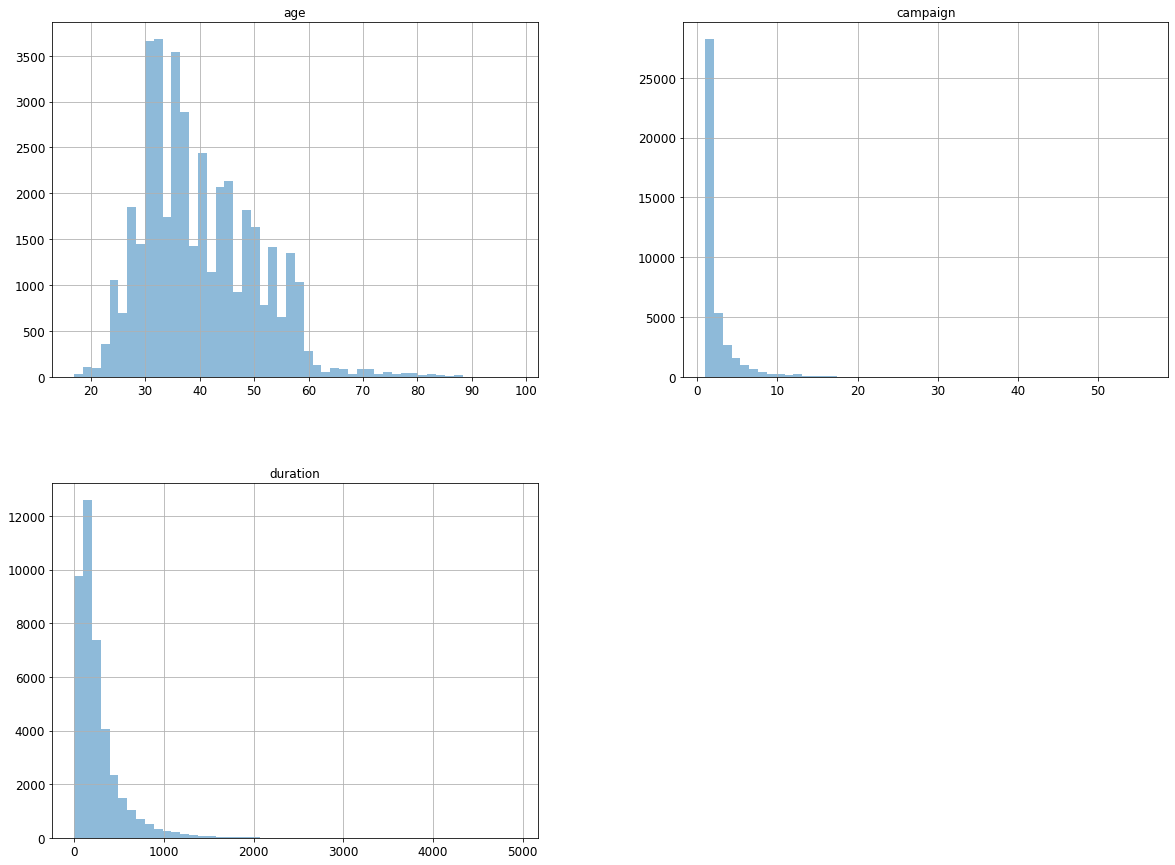

In [12]:
df.hist(bins=50, figsize=(20,15), alpha=0.5)
plt.rcParams['axes.grid'] = False
plt.grid(False)
plt.show()

<div class="alert alert-success">

<b>Figure 1</b>
    
From these graphs, we can observe that the scales between numeric variables are very different from each other. We may  need to rescale the variables in the data preparation part.

The dataset has a wide range of age: from around 17 to around 98, and most samples are at age between 30-40. People at this age may be more likely contacted by the bank because they have stable income and more likely to buy bank product to save money for future use. 
    
Number of contacts conducted in this compaign are mainly below 5 because customer is easily to get dissatisfied with product promoting calls. Therefore, the bank may tend to avoid calling a customer too many times.
    
The duration of the call is mainly below 300. This may because customers are usually impatient with product promoting calls.
</div>


In [13]:
# splitting the dataset for training and testing
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [14]:
train = train.reset_index(drop=True)

# 2. Data visualization

In [15]:
# create a copy of the training set so that we can do analysis on the copy set without change the training set
marketing = train.copy()

In [16]:
marketing.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,y
0,40,blue-collar,married,basic.9y,yes,no,telephone,jul,mon,94,2,no
1,31,admin.,married,university.degree,no,no,cellular,may,mon,116,4,no
2,59,retired,married,basic.4y,no,no,cellular,may,mon,13,6,no
3,43,housemaid,divorced,basic.9y,yes,no,cellular,jul,tue,94,5,no
4,39,admin.,single,high.school,no,no,telephone,may,thu,344,2,no


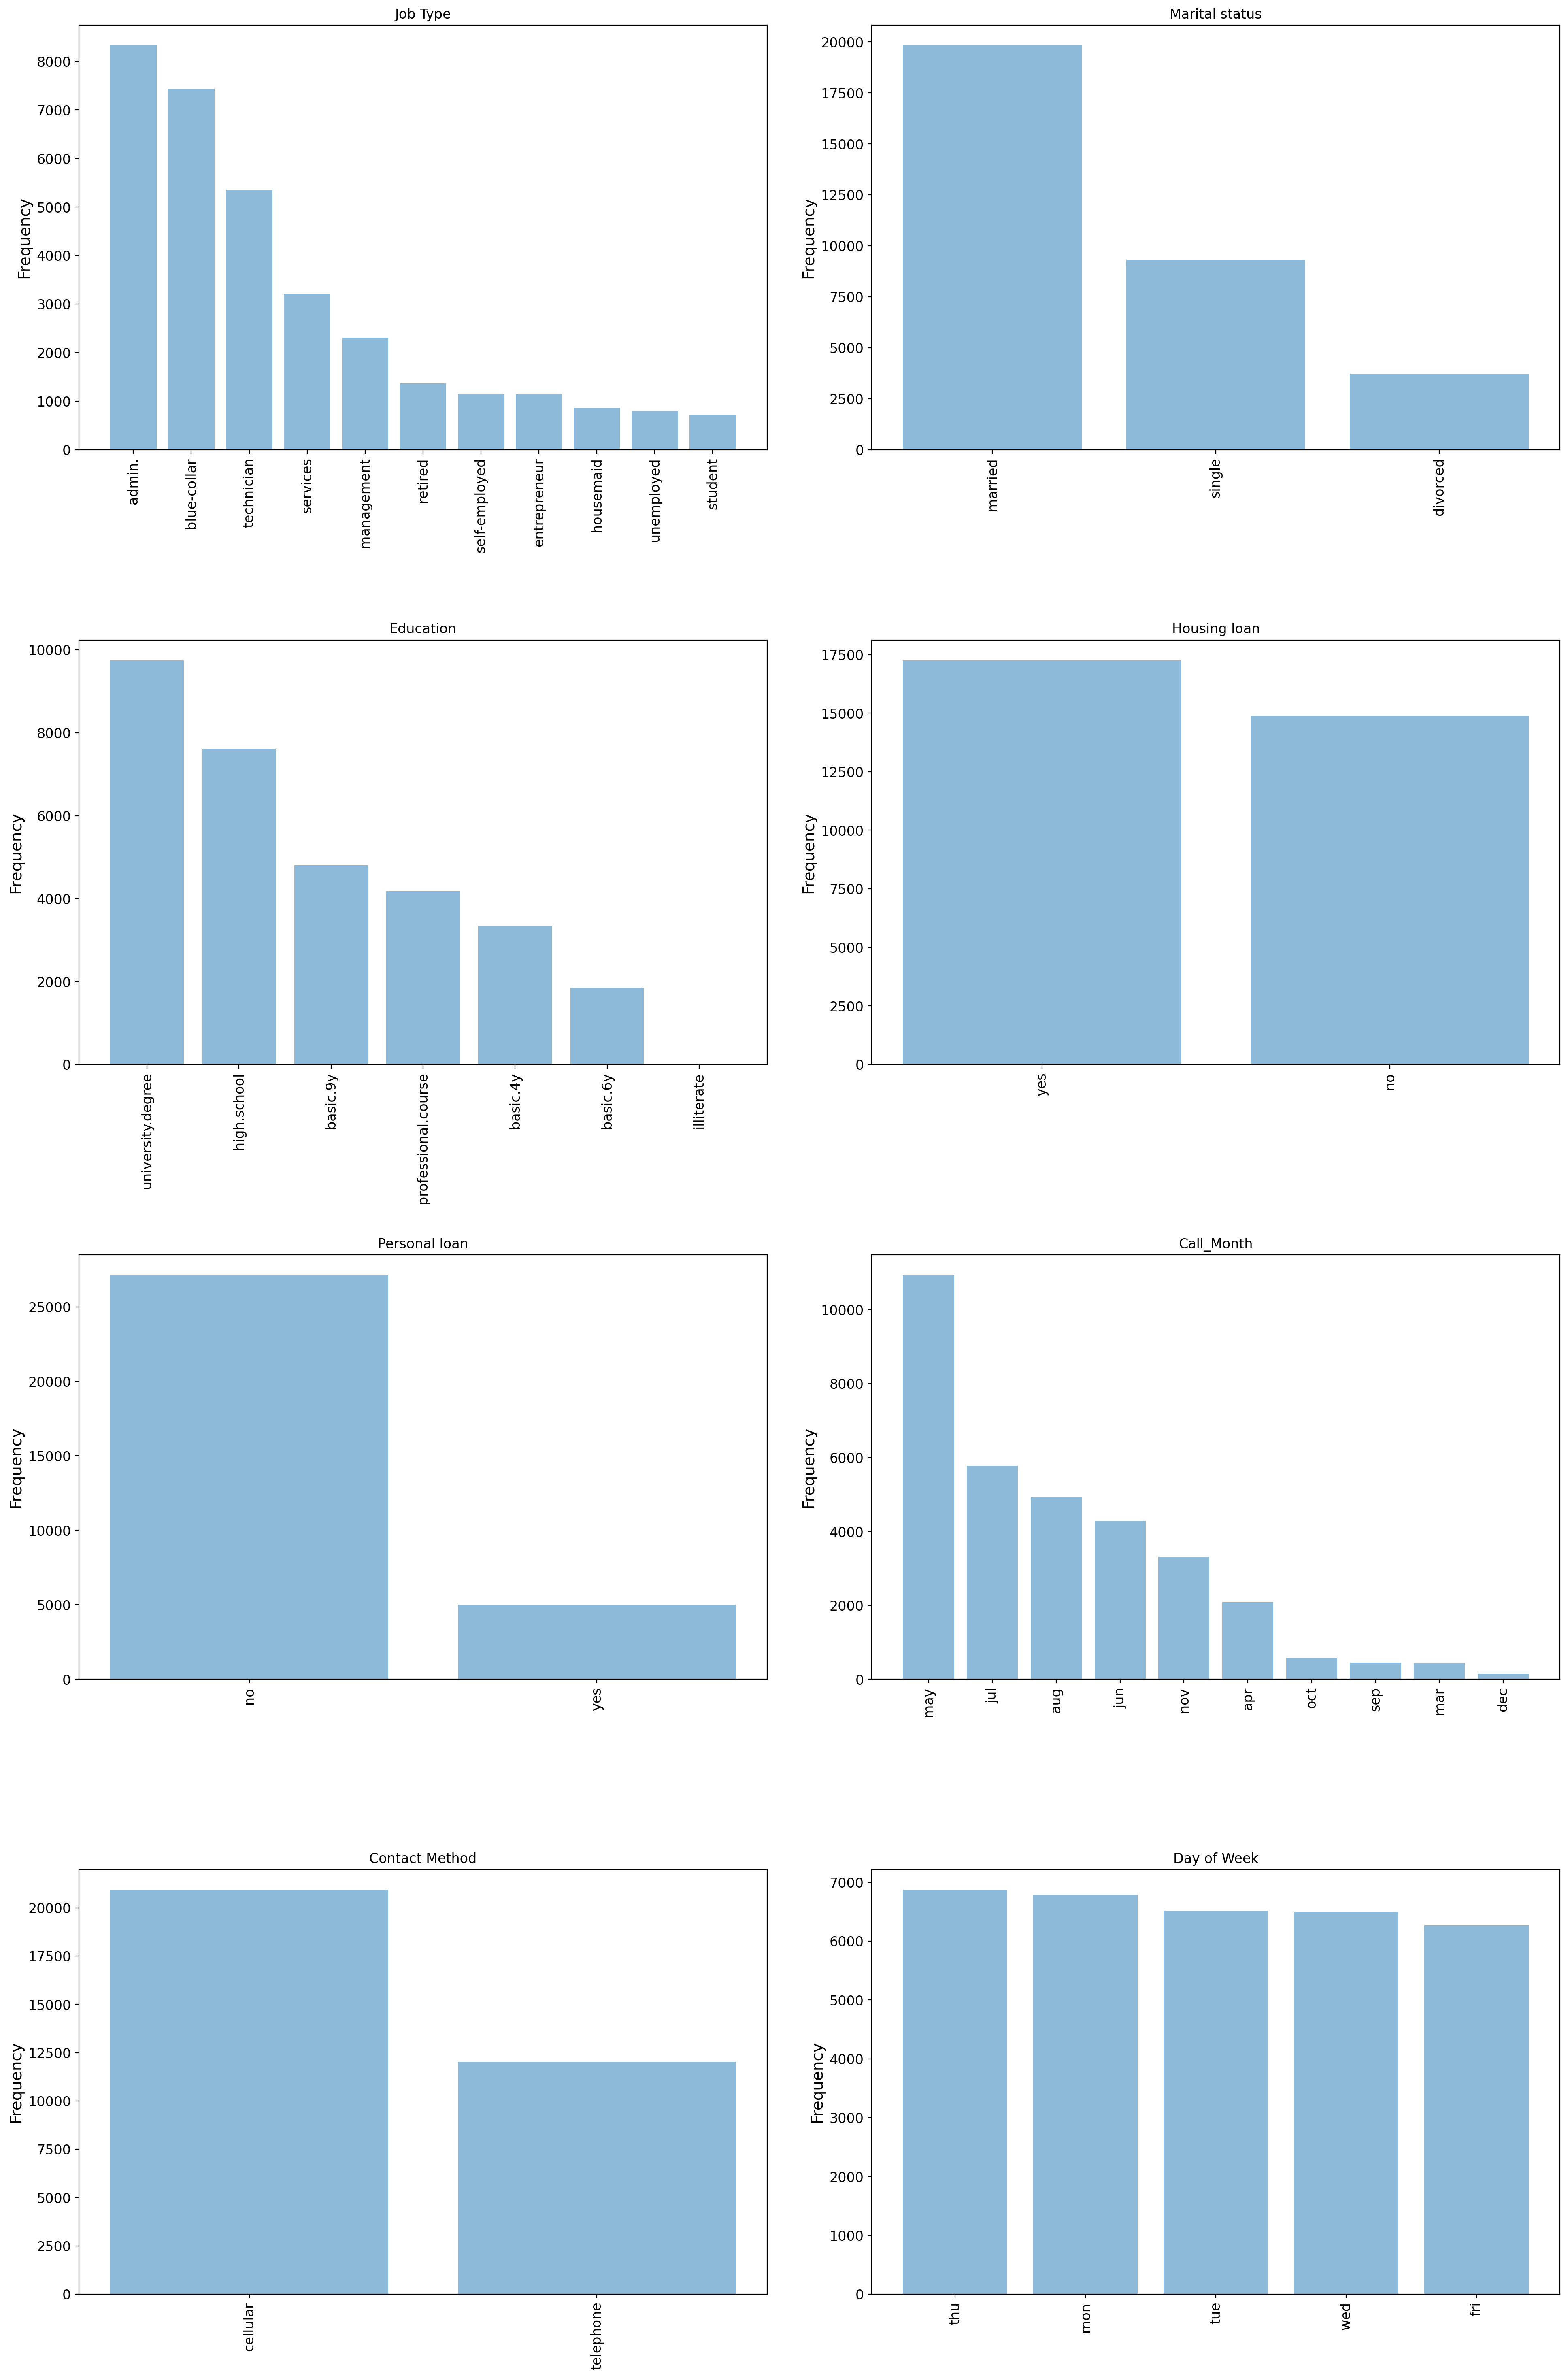

In [17]:
# plot bar charts of categorical variables to visualize the number of samples in each category within each variable

#set fig size
plt.figure(figsize=(20,30), dpi=200)

# plot the first graph on job types
plt.subplot(4,2,1)
job = pd.DataFrame(marketing.groupby(['job'])['job'].count()).rename({'job':'count'},axis=1)
job = job.sort_values(by='count',ascending=False)
job = job.drop('unknown')
y_pos = np.arange(len(job))
plt.bar(y_pos,job['count'], align='center', alpha=0.5)
plt.xticks(y_pos, job.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Job Type')

# plot the frequency of marital status
plt.subplot(4,2,2)
mary = pd.DataFrame(marketing.groupby(['marital'])['marital'].count()).rename({'marital':'count'},axis=1)
mary = mary.sort_values(by='count',ascending=False)
mary = mary.drop('unknown')
y_pos = np.arange(len(mary))
plt.bar(y_pos,mary['count'], align='center', alpha=0.5)
plt.xticks(y_pos, mary.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Marital status')

# plot the frequency of different education level
plt.subplot(4,2,3)
edu = pd.DataFrame(marketing.groupby(['education'])['education'].count()).rename({'education':'count'},axis=1)
edu = edu.sort_values(by='count',ascending=False)
edu = edu.drop('unknown')
y_pos = np.arange(len(edu))
plt.bar(y_pos,edu['count'], align='center', alpha=0.5)
plt.xticks(y_pos, edu.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Education')

# plot the frequency of people have or don't have a housing loan
plt.subplot(4,2,4)
house_loan = pd.DataFrame(marketing.groupby(['housing'])['housing'].count()).rename({'housing':'count'},axis=1)
house_loan = house_loan.sort_values(by='count',ascending=False)
house_loan = house_loan.drop('unknown')
y_pos = np.arange(len(house_loan))
plt.bar(y_pos,house_loan['count'], align='center', alpha=0.5)
plt.xticks(y_pos, house_loan.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Housing loan')

# plot the frequency of people have or don't have a personal loan
plt.subplot(4,2,5)
personal_loan = pd.DataFrame(marketing.groupby(['loan'])['loan'].count()).rename({'loan':'count'},axis=1)
personal_loan = personal_loan.sort_values(by='count',ascending=False)
personal_loan = personal_loan.drop('unknown')
y_pos = np.arange(len(personal_loan))
plt.bar(y_pos,personal_loan['count'], align='center', alpha=0.5)
plt.xticks(y_pos, personal_loan.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Personal loan')

# plot the frequency of the month the call is made
plt.subplot(4,2,6)
month = pd.DataFrame(marketing.groupby(['month'])['month'].count()).rename({'month':'count'},axis=1)
month = month.sort_values(by='count',ascending=False)
y_pos = np.arange(len(month))
plt.bar(y_pos,month['count'], align='center', alpha=0.5)
plt.xticks(y_pos, month.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Call_Month')

# plot the frequency of contact method
plt.subplot(4,2,7)
contact_method = pd.DataFrame(marketing.groupby(['contact'])['contact'].count()).rename({'contact':'count'},axis=1)
contact_method = contact_method.sort_values(by='count',ascending=False)
y_pos = np.arange(len(contact_method))
plt.bar(y_pos,contact_method['count'], align='center', alpha=0.5)
plt.xticks(y_pos, contact_method.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Contact Method')

# plot the frequency of the day of week the call is made
plt.subplot(4,2,8)
day_of_week = pd.DataFrame(marketing.groupby(['day_of_week'])['day_of_week'].count()).rename({'day_of_week':'count'},axis=1)
day_of_week = day_of_week.sort_values(by='count',ascending=False)
y_pos = np.arange(len(day_of_week))
plt.bar(y_pos,day_of_week['count'], align='center', alpha=0.5)
plt.xticks(y_pos, day_of_week.index, rotation=90)
plt.ylabel('Frequency')
plt.title('Day of Week')


plt.tight_layout(pad=3.0) # set distance between graphs
plt.show()

<div class="alert alert-success">

<b>Figure 2</b> 

From this figure, we can know that we have an imbalanced dataset, especially with variables: job, education, personal loan and call month. We have majority of the samples in one categories, which may lead to a biased when performing ML algorithms. We may not use call month as one of the attributes in our model since most calls are performed in May and this may because of the time setting of this campaign, which is not helpful for our analysis.

</div>


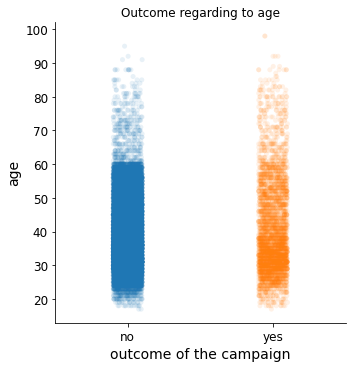

In [18]:
# plot continuous variable age versus the outcome of the campaign

g= sns.catplot(x="y", y="age", data=marketing, alpha=0.1)
plt.xlabel('outcome of the campaign')
plt.title('Outcome regarding to age')
plt.show(g)

<div class="alert alert-success">

<b>Figure 3</b>

Customers at age between 25 to 40 seems more likely to accept the offer, after that is customer above 40 and below 60. This may because people at this age are more activily in buying term deposit to save money for retirement and future use. They are people with constant income and can manage their own money (one can get economic independence after 25) .
    
</div>


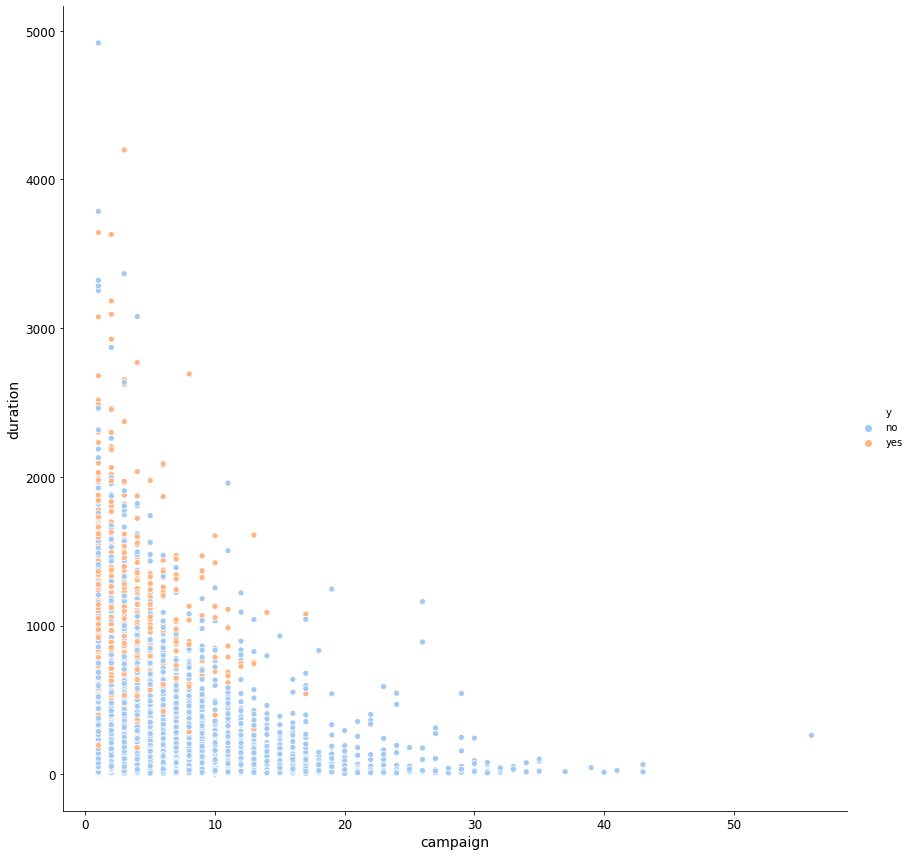

In [19]:
g=sns.relplot(x="campaign", y="duration", hue='y', data=marketing, palette="pastel", height=12)

# new_legend = 'outcome'
# g._legend.set_title(new_legend)
# replace labels
# new_labels = ['fail', 'success']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.title("Scatter plot of no. of calls made in this campaign and total call duration in relation to the outcome")

plt.show(g)

<div class="alert alert-success">
<b>Figure 4</b>

Since campaign and duration are all about the feature of campaign, we plot them together. 
From this graph, most successful marketing is with less call (below 5) and higher duration. However, we cannot control for duration in reality since the customer could hang up the call at any minute. Thus, under the consideration of reality circumstances, we may not include duration in our model.
    
</div>

In [20]:
def data_vis_stacked_bar(df, attribute, title, ylable):
    rang = int(len(df[attribute].unique()))
    # find the order of the number of data in the train set regarding with different categories in attributes
    order = df.groupby(attribute).count().apply(lambda x: x.sort_values(ascending=False)) 
    order = order.index.values[::-1]
    # find the number of people in each category, separated by the result of campaign
    attri = df.groupby(['y',attribute]).count()
    attri = attri['age'].groupby('y', group_keys=False).apply(lambda x: x.sort_values(ascending=False))

    # get the number of customer who didn't buy the product in each category with an order in order
    fail = attri[:rang] # extract failed data
    fail = pd.DataFrame(fail).reset_index()
    fail[attribute]=pd.Categorical(fail[attribute],categories=order) 
    fail=fail.sort_values(attribute) # sort in order
    fail = fail['age'].values

    # get the number of customer who buy the product in each job type with an order in order
    success = attri[rang:]
    success = pd.DataFrame(success).reset_index()
    success[attribute]=pd.Categorical(success[attribute],categories=order) 
    success=success.sort_values(attribute) # sort in plot_order
    success = success['age'].values
    
    # plot the outcome of campaign by marital status using stacked bar plot
    f, ax = plt.subplots(figsize=(12,6))

    ax.barh(order, success, label='success', alpha = 0.5)
    ax.barh(order, fail, left=success, label='fail', alpha=0.3)

    ax.set_ylabel('{}'.format(ylable))
    ax.set_title('Outcome of the campaign by {}'.format(title))
    ax.legend(loc = 'lower right')

    plt.show()

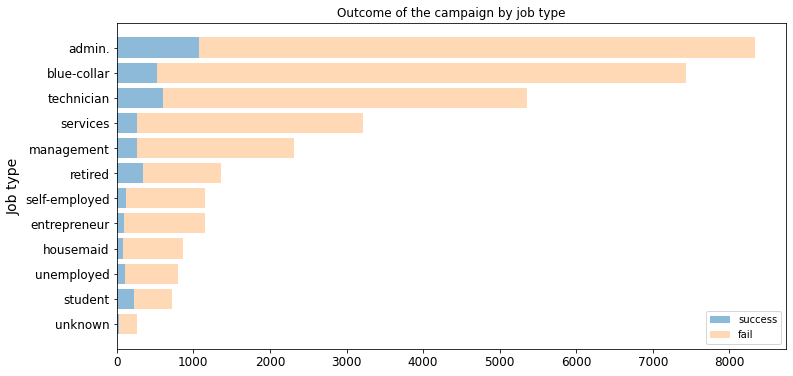

In [21]:
data_vis_stacked_bar(marketing,'job', 'job type', 'Job type')

<div class="alert alert-success">
<b>Figure 5</b>

According to this graph, people who is admin, technician, blue-collar are more likely to subscribe to the term deposit. These people have relatively higher income. Surprisingly, students have a similar successful rate with people working in services and management area. This may also come from their parents who save money for their children.

However, this high number of subscription rate may due to the imbalance of the dataset, which need to be awared at.
</div>

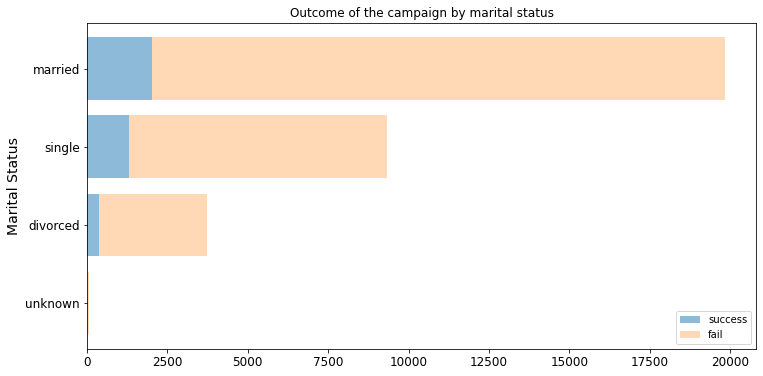

In [22]:
data_vis_stacked_bar(marketing,'marital', 'marital status', 'Marital Status')

<div class="alert alert-success">
<b>Figure 6</b>

Married person has the largest number of subscription. This may because married person need to manage money for their children for their futures use while single person don't need to consider about these things. However, this might because of the high number of married person in our sample.
</div>


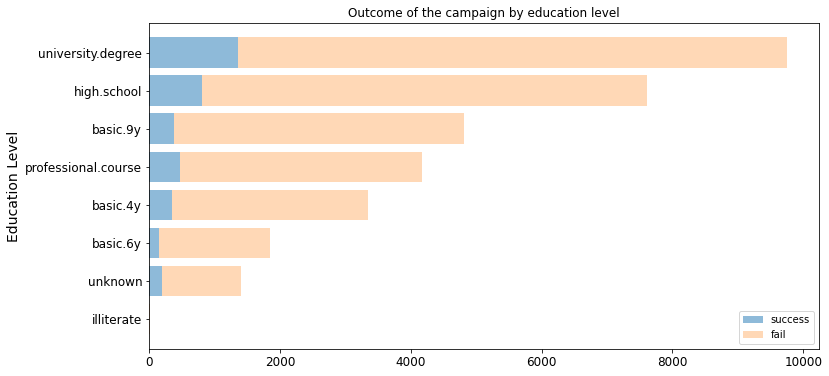

In [23]:
data_vis_stacked_bar(marketing,'education', 'education level', 'Education Level')

<div class="alert alert-success">
<b>Figure 7</b>

People with university degree, high-school degree and who have attended professional course are with the highest subscription number. Thus, customer with higher education level may more likely to subscribe to the term deposit.
</div>


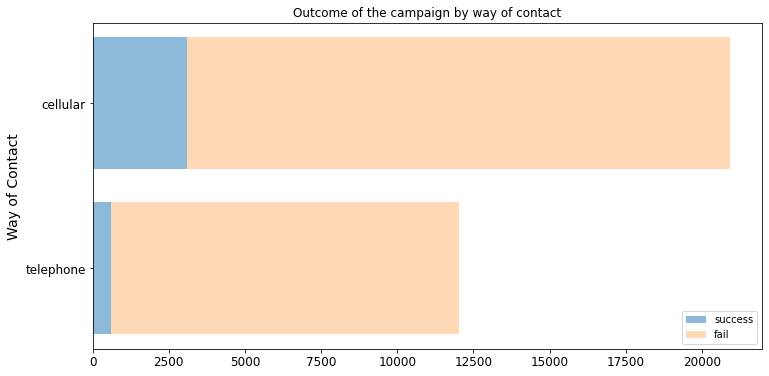

In [24]:
data_vis_stacked_bar(marketing, 'contact', 'way of contact', 'Way of Contact')

<div class="alert alert-success">
<b>Figure 8</b>

Regarding to the graph, contacting with cellular seems have more chance of succeed. However, this might because most people communicate with others through cellular phone.
</div>


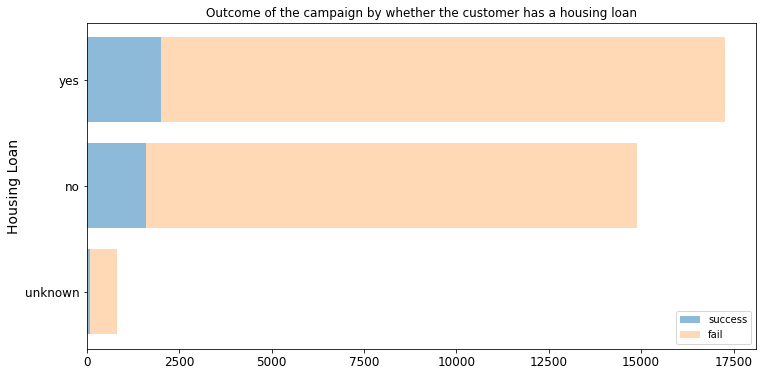

In [25]:
data_vis_stacked_bar(marketing,'housing','whether the customer has a housing loan', 'Housing Loan')

<div class="alert alert-success">
<b>Figure 9</b>

We have slightly more successful subscriptions from client with a housing loan. However, since the sample of people with housing loan is more than sample of peoole without a housing loan, we cannot say if this difference is significant or not.
</div>

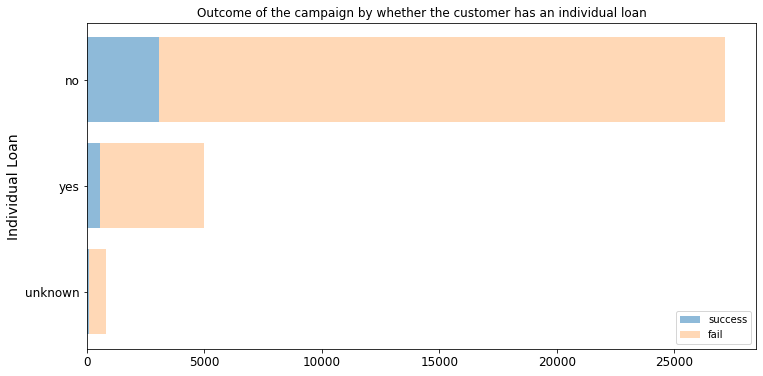

In [26]:
data_vis_stacked_bar(marketing,'loan', 'whether the customer has an individual loan', 'Individual Loan')

<div class="alert alert-success">
<b>Figure 10</b>

According to the graph, people without individual loan are more likely to subscribe to the term deposit. This result is different from the previous housing loan. People without a personal loan may have more spare money which can be saved as term deposit. However, this result may still due to the imbalance of the dataset. 
</div>


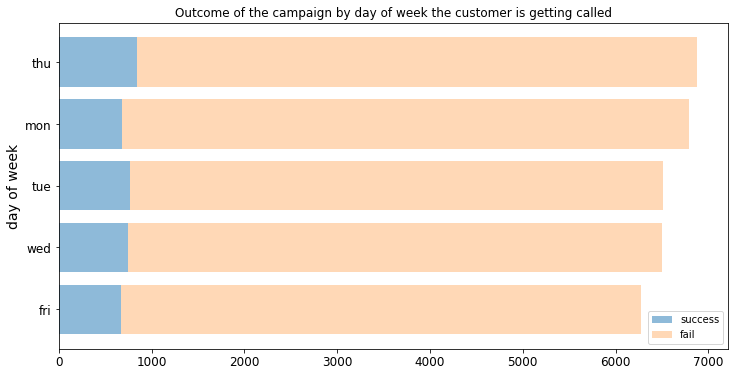

In [92]:
data_vis_stacked_bar(marketing, 'day_of_week', 'day of week the customer is getting called', 'day of week')


<div class="alert alert-success">
<b>Figure 11</b>

According to the graph, The difference between the results of the marketing campaign regarding to different work days is subtle. Different days of week have similar result number of subscription. If we look closer, call on days between the week (Tuesday, Wednesday, Thursday) are more likely to get success subscription.

# 3. Data preparation

In [28]:
cleaning = train.copy()

# replace 'unknown' into nan to deal with na values
cleaning = cleaning.replace('unknown', np.NaN)

# replace the outcome, 'y', with binary values for model training
cleaning['y'] = cleaning['y'].replace(['yes', 'no'], [1,0])

In [29]:
cleaning.y.value_counts()

0    29245
1     3705
Name: y, dtype: int64


<div class="alert alert-success">
The target, 'y', is too imbalanced. There are too many samples that the client didn't subscribe to the term deposit at end of this marketing campaign. So the predictor may just assign 0 to all of the prediction. And in fact, after training with SVM and Logistic Regression, 0 postive outcome is predicted by both models. The precision rate is 0 when we have this imbalanced dataset. Therefore, we decide to under sampling the dataset by randomly picking successful and failed samples from the imbalanced training set to form a new training set.
</div>



In [32]:
np.random.seed(seed=42)

# randomly choose 3000 success examples
success_indices = cleaning[cleaning.y == 1].index
random_indices = np.random.choice(success_indices, 3000, replace=False)
success_sample = cleaning.loc[random_indices]

# randomly choose 15000 failed examples
fail_indices = cleaning[cleaning.y == 0].index 
random_indices = np.random.choice(fail_indices, 10000, replace=False) 
fail_sample = cleaning.loc[random_indices]

# combine success and failed to a new training set
under_sample = success_sample.append(fail_sample)

# seperate X train and y train
X_train_pre = under_sample.drop("y", axis=1)
y_train = under_sample["y"].copy()

In [33]:
# build the pipeline for numeric variables
# we transform the nan value to the median of that variable
# we standardized numeric values

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [34]:
# MostFrequentImputer can help to fill the na values of categorical variables
# it selects the most frequent category in that variable

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [35]:
# build pipeline for categorical variables
# we transform the na value to the most frequently appeared category of that variable
# encoding the category into binary forms

cat_pipeline = Pipeline([
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


In [36]:
# combine pipelines

num_attribs = ['age', 'campaign']
cat_attribs = ['job', 'marital', 'education', 'housing',
               'loan', 'contact', 'day_of_week']
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [37]:
# transform X_train to get the final training set

X_train = preprocess_pipeline.fit_transform(X_train_pre)

In [38]:
# transforming test set

test_data = test.copy() # create a copy of testing set

test_data = test_data.replace('unknown', np.NaN) #dealing with unknown entries
test_data['y'] = test_data['y'].replace(['yes', 'no'], [1,0])

cleaning_test = test_data.drop('y', axis=1)
y_test = test_data["y"].copy()

# use defined pipeline to transform testing set
X_test = preprocess_pipeline.transform(cleaning_test)

# 4. Select and Train a Model

## 4.1 SVM

In [39]:
# train with SVM

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train) # fit the model with training set

SVC(gamma='auto')

In [40]:
# use cross validation to get an idea of the performance of our model on the training set
score = cross_val_score(svm_clf, X_train, y_train, cv=3)
score.mean()

0.7723078375309335

In [41]:
# predict using testing set and find the mse and mae of the result

y_svm = svm_clf.predict(X_test)

mse_svm = mean_squared_error(y_test, y_svm)
mae_svm = mean_absolute_error(y_test, y_svm)

print('mse_svm: ', mse_svm, '; mae_svm: ', mae_svm)

mse_svm:  0.11313425588735129 ; mae_svm:  0.11313425588735129


In [42]:
# obtain the confusion matrix

cm_svm = confusion_matrix(y_test,y_svm)
cm_svm

array([[7279,   24],
       [ 908,   27]])

In [43]:
# obtain the precision and recall rate
print("Precision: {:.2f}%".format(100 * precision_score(y_test,y_svm)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test,y_svm)))

Precision: 52.94%
Recall: 2.89%


In [44]:
# generate a dataframe with accuracy, recall, precision rate and ROC AUC score
# preparing to final comparison

svm_df = pd.DataFrame(data=[accuracy_score(y_test, y_svm), recall_score(y_test, y_svm),
                   precision_score(y_test, y_svm), roc_auc_score(y_test, y_svm)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

## 4.2 Logistic Regression

In [45]:
# train with logistic regression

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)

score = cross_val_score(log_clf, X_train, y_train, cv=3)
score.mean()

0.7731540742209662

In [46]:
y_log = log_clf.predict(X_test)
mse_log = mean_squared_error(y_test, y_log)
mae_log = mean_absolute_error(y_test, y_log)

print('mse_svm: ', mse_svm, '; mae_svm: ', mae_svm)

mse_svm:  0.11313425588735129 ; mae_svm:  0.11313425588735129


In [47]:
# confusion matrix
cm_log = confusion_matrix(y_test,y_log)
cm_log

array([[7195,  108],
       [ 859,   76]])

In [48]:
# precision rate and recall rate
print("Precision: {:.2f}%".format(100 * precision_score(y_test,y_log)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test,y_log)))

Precision: 41.30%
Recall: 8.13%


In [49]:
# generate a dataframe with accuracy, recall, precision rate and ROC AUC score
# preparing to final comparison

log_df = pd.DataFrame(data=[accuracy_score(y_test, y_log), recall_score(y_test, y_log),
                   precision_score(y_test, y_log), roc_auc_score(y_test, y_log)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

## 4.3 Random Forest

In [50]:
# train with random forest predictor

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train)

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7405384615384615

In [51]:
y_forest = forest_clf.predict(X_test)
mse_log = mean_squared_error(y_test, y_forest)
mae_log = mean_absolute_error(y_test, y_forest)

print('mse_svm: ', mse_svm, '; mae_svm: ', mae_svm)

mse_svm:  0.11313425588735129 ; mae_svm:  0.11313425588735129


In [52]:
cm_rf = confusion_matrix(y_test, y_forest)
cm_rf

array([[6519,  784],
       [ 708,  227]])

In [53]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_forest)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_forest)))

Precision: 22.45%
Recall: 24.28%


In [54]:
rf_df = pd.DataFrame(data=[accuracy_score(y_test, y_forest), recall_score(y_test, y_forest),
                   precision_score(y_test, y_forest), roc_auc_score(y_test, y_forest)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

<div class="alert alert-success">
Since the precision rate is low among all the models, we may want to ensemble the models using majority voting prediction.
</div>

## 4.4 Majority Voting

In [58]:
# train with majority voting predictor

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', forest_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto'))])

In [59]:
y_mv = voting_clf.predict(X_test)
mse_log = mean_squared_error(y_test, y_mv)
mae_log = mean_absolute_error(y_test, y_mv)

print('mse_svm: ', mse_svm, '; mae_svm: ', mae_svm)

mse_svm:  0.11313425588735129 ; mae_svm:  0.11313425588735129


In [60]:
cm_mv = confusion_matrix(y_test, y_mv)
cm_mv

array([[7241,   62],
       [ 877,   58]])

In [61]:
mv_df = pd.DataFrame(data=[accuracy_score(y_test, y_mv), recall_score(y_test, y_mv),
                   precision_score(y_test, y_mv), roc_auc_score(y_test, y_mv)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

## 4.5 Model Comparison

In [62]:
# find the accuracy of each model
for clf in (log_clf, forest_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8826171400825443
RandomForestClassifier 0.8188880796309784
SVC 0.8868657441126487
VotingClassifier 0.8860160233066279


<ipython-input-66-05f15eb1aa52>:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
<ipython-input-66-05f15eb1aa52>:96: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax3.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


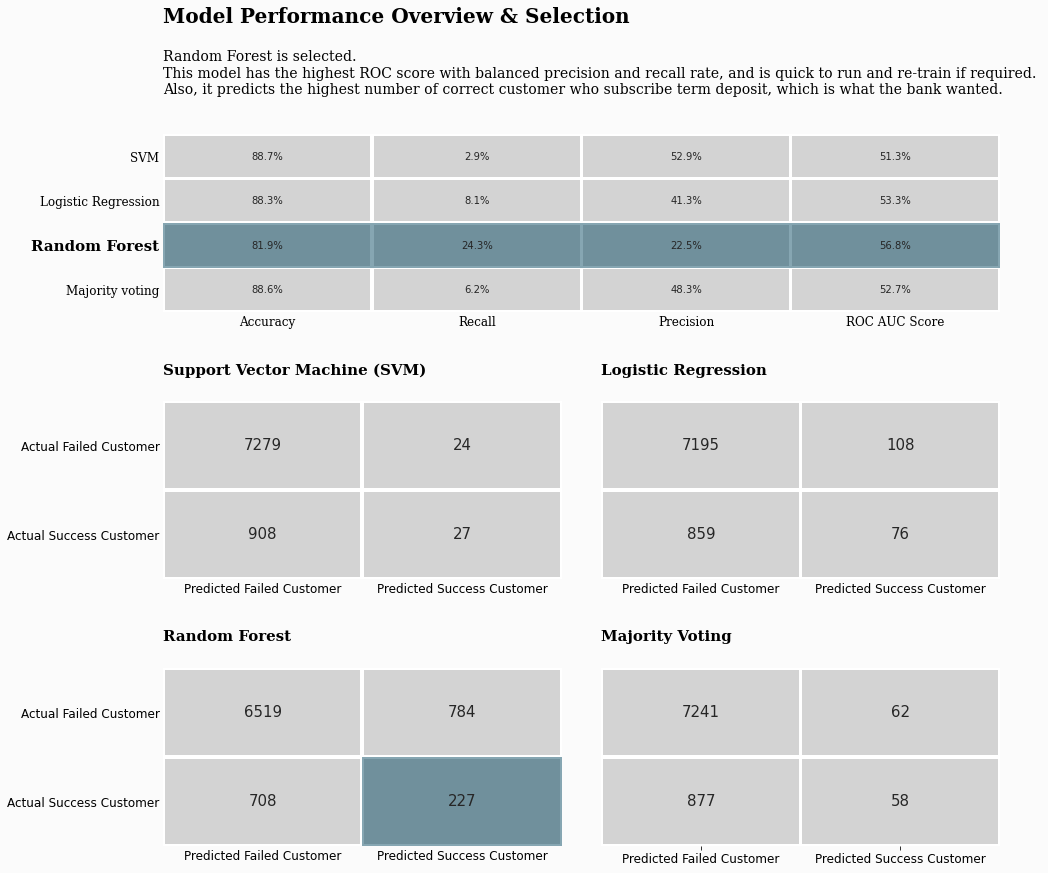

In [66]:
# Visualize the result and select the model

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# create figure
fig = plt.figure(figsize=(15,18)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])



# combining the result and metrics of models
df_models = round(pd.concat([svm_df,log_df, rf_df, mv_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)


ax0.set_yticklabels(['SVM','Logistic Regression','Random Forest','Majority voting'], fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

# set title
ax0.text(0,-2.5,'Model Performance Overview & Selection',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(0,-0.55,
         '''
Random Forest is selected.
This model has the highest ROC score with balanced precision and recall rate, and is quick to run and re-train if required. 
Also, it predicts the highest number of correct customer who subscribe term deposit, which is what the bank wanted.
'''
         ,fontfamily='serif',fontsize=14)


# bold the selected model
for lab, annot in zip(ax0.get_yticklabels(), ax0.texts):
    text =  lab.get_text()
    if text == 'Random Forest': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(15)
        lab.set_color('black')
        

rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

# set the graph for confusion matrix
# svc
sns.heatmap(cm_svm, linewidths=2.5,yticklabels=['Actual Failed Customer','Actual Success Customer'],xticklabels=['Predicted Failed Customer','Predicted Success Customer'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# log
sns.heatmap(cm_log, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Failed Customer','Predicted Success Customer'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# rf
sns.heatmap(cm_rf, linewidths=2.5,yticklabels=['Actual Failed Customer','Actual Success Customer'],xticklabels=['Predicted Failed Customer','Predicted Success Customer'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# mv
sns.heatmap(cm_mv, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Failed Customer','Predicted Success Customer'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# highlight the selected model
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)


ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)


    
# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color


# set the title
ax1.text(0, -0.3, 'Support Vector Machine (SVM)',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Logistic Regression', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'Majority Voting', fontsize=15, fontweight='bold', fontfamily='serif')

# highlight the highest TP
ax3.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

<div class="alert alert-success">
<b>Model Selection: </b> 

This project is aiming to predict the consumers who are more likely to subscribe term deposit. The model of choice is the Random Forest according to the above result.
This model has the highest ROC score with balanced precision and recall rate, and is quick to run and re-train if required. 
Also, it predicts the highest number of correct customer who subscribe term deposit, which is what the bank wanted.

</div>

# 5. Model tuning

In [67]:
# set random forest regressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [68]:
# performing fine tuning using randomized search
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=6),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9802c740d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9800542ac0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [69]:
# obtain the evaluation scores
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5265181634120538 {'max_features': 4, 'n_estimators': 93}
0.5282501693169599 {'max_features': 3, 'n_estimators': 72}
0.5304665828042391 {'max_features': 5, 'n_estimators': 21}
0.5298384754536082 {'max_features': 2, 'n_estimators': 75}
0.5276077317532881 {'max_features': 3, 'n_estimators': 88}
0.5254931026366029 {'max_features': 5, 'n_estimators': 100}
0.5272547384806449 {'max_features': 3, 'n_estimators': 150}
0.5801974839026174 {'max_features': 5, 'n_estimators': 2}
0.5260885461689634 {'max_features': 4, 'n_estimators': 158}
0.5289529465434203 {'max_features': 2, 'n_estimators': 192}


In [70]:
# find the best sets of parameters
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 100}

In [71]:
# check the importance of each feature
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([4.31223863e-01, 1.38950445e-01, 1.68463168e-02, 1.22864450e-02,
       7.40812389e-03, 5.59966643e-03, 9.71153086e-03, 9.44836501e-03,
       7.59215718e-03, 9.66144987e-03, 1.03719997e-02, 1.43525831e-02,
       8.13997286e-03, 1.11385649e-02, 1.41476081e-02, 1.19957175e-02,
       8.55095645e-03, 6.33958810e-03, 1.12655867e-02, 1.44203714e-02,
       2.38560911e-04, 1.14850617e-02, 1.42444216e-02, 2.02805120e-02,
       1.98455101e-02, 1.52285914e-02, 1.55326684e-02, 2.29820961e-02,
       1.88147272e-02, 1.98321987e-02, 1.99380654e-02, 1.96615669e-02,
       2.14394733e-02, 2.10252340e-02])

In [84]:
# display the importance of features regarding to the attribute name
cat_attributes = preprocess_pipeline.transformers_[1][1].named_steps['cat_encoder'].get_feature_names(cat_attribs)
attributes = num_attribs + list(cat_attributes)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.43122386335094753, 'age'),
 (0.13895044493846845, 'campaign'),
 (0.0229820961455302, 'contact_cellular'),
 (0.02143947334854651, 'day_of_week_tue'),
 (0.021025234045376803, 'day_of_week_wed'),
 (0.02028051204314063, 'housing_no'),
 (0.019938065422123934, 'day_of_week_mon'),
 (0.019845510054923094, 'housing_yes'),
 (0.01983219874292622, 'day_of_week_fri'),
 (0.019661566911415723, 'day_of_week_thu'),
 (0.018814727172353506, 'contact_telephone'),
 (0.01684631679452832, 'job_admin.'),
 (0.015532668373078434, 'loan_yes'),
 (0.015228591426620763, 'loan_no'),
 (0.014420371407470003, 'education_high.school'),
 (0.014352583103123553, 'job_technician'),
 (0.01424442164395459, 'education_university.degree'),
 (0.014147608074466496, 'marital_married'),
 (0.012286444953228347, 'job_blue-collar'),
 (0.011995717468143449, 'marital_single'),
 (0.011485061713948806, 'education_professional.course'),
 (0.011265586660470442, 'education_basic.9y'),
 (0.011138564944718213, 'marital_divorced'),
 (0.0103

<div class="alert alert-success">
<b>Importance List of Attributes</b>

We can see that <b>age</b> and <b>campaign</b> are the most important factors in predicting client's decision in whether subscribing the term deposit. Besides, contacting through phone on Tuesday to a married client who has personal loan but no housing loan and whose job is administrator with high school education level is more likely to get succeed subscription.
</div>

In [86]:
# run the model with the best set of parameters we found above
# using the model to predict using testing set
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_test)

# find the rmse of the prediction
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [87]:
final_rmse

0.3720541987982615

In [88]:
# compute a 95% confidence interval for the test RMSE

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.36540067, 0.37859081])

# 6. Conclusion

We decide our model for predicting the customer who are more likely to subscribe to the term deposit to be Random Forest because it is the only model has a balanced recall and precision rate. It has the largest ROC AUC score and with the highest number of correct prediction of subscribed customer. Therefore, the result of this model matches the requirement of the bank the most. 

After fine-tuning the model, we get a best combination of hyper-parameters: `max_features=5`, `n_estimators=100` and have a 95% confidence interval of the rmse: (0.36540067, 0.37859081). The most important features according to our result are **age** and **campaign**. Surprisingly, day of week also plays an important role in predicting the result of the campaign.

This model do have limitations. The precision rate rate is very low (22.45%). This may due to the lack of subscription samples. In addition, the dataset is very imbalanced. For example: we have a lot more people whose job is administrator in our dataset than other job types. This may lead the ML algorithm to think that administrator are more likely to subscribe (which is the case according to the attributes importance list). However, it might not be true. After collecting more samples, we could re-train the models to get a better result. 

# 7. References

- Joshua. 2021. Awesome HR Data Visualization & Prediction. [online] Available at: <https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction/notebook> [Accessed 19 March 2021].
- Aurélien Géron. 2019. O'Reilly Media, Inc. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition.
